In [1]:
import pandas as pd
from Functions import *
from Telescope import *
import Ariel

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
# with_vector_pandas = 427

In [3]:
%load_ext line_profiler

In [4]:
nirspec = Telescope("Ariel NIRSpec", 1, (1.10, 1.95), 10, 0.27)
nirspec.constructTable()

In [7]:
avg1 = 3.91
avg2 = 2.78

print(f"Average run time with for loop (unvectorized): {avg1}s ")
print(f"Average run time with vectorized for loop: {avg2}s ")

print("\nThe vectorized function is x{:.3} faster than the unvectorized function.".format(avg1/avg2))

Average run time with for loop (unvectorized): 3.91s 
Average run time with vectorized for loop: 2.78s 

The vectorized function is x1.41 faster than the unvectorized function.


In [6]:
%%timeit
nirspec.constructTable()

2.78 s ± 88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
nirspec.getESM()

,Planet Name
0,TOI-5704b
1,TOI-672b
2,TOI-199b
3,WASP-176b
4,TOI-1801b
...,...
692,TOI-1693b
693,NGTS-8b
694,K2-405b
695,TOI-532b


In [5]:
%lprun -f Ariel.Telescope.getParam nirspec.constructTable()

TypeError: Telescope.__calculateParams__() missing 1 required positional argument: 'arr'

In [5]:
%lprun -f eclipseFlux eclipseFlux(target["Planet Radius [Rjup]"], target["Star Radius [Rs]"], (1.10, 1.15), 1000, 3000)

Timer unit: 1e-09 s

Total time: 0.018781 s
File: /Users/ben_coull-neveu/Dropbox/- School -/Ariel Summer Internship 2024/EXOECHO_PACKAGE/ExoEcho/src/ExoEcho/Functions.py
Function: eclipseFlux at line 102

Line #      Hits         Time  Per Hit   % Time  Line Contents
   102                                           def eclipseFlux(Rp:float, R_star:float, wavelength:float, tday:float, teff:float, Rp_units:str="R_jup", R_star_units:str="R_sun", wavelength_units:str="um")->float:
   103                                               """Returns the thermal contrast ratio.
   104                                           
   105                                               Args:
   106                                                   Rp (float): Planetary radius, in units provided by Rp_units.
   107                                                   R_star (float): Stellar radius, in units provided by R_star_units.
   108                                                   wavelength (float)

In [4]:
Tday_time= 444789.0
v_Tday_time= 664265.0 
print(f"Tday / v_Tday = {Tday_time/v_Tday_time}\n")

v_eclipseFlux_time= 1808892.0
eclipseFlux_time= 9350234.0
print(f"eclipseFLux / v_eclipseFLux = {eclipseFlux_time/v_eclipseFlux_time}\n")

veclipse_planck_time = 940631.0 
veclipse_vplanck_time = 1789734.0 
print(f"veclipse_planck / veclipse_vplanck = {veclipse_planck_time/veclipse_vplanck_time}\n")

Tday / v_Tday = 0.6695957185761706

eclipseFLux / v_eclipseFLux = 5.169039389858543

veclipse_planck / veclipse_vplanck = 0.5255702802762868



In [13]:
%lprun -f Ariel.eclipseFlux Telescope("Ariel NIRSpec", 1, (1.10, 1.95), 10, 0.27).constructTable()

Timer unit: 1e-09 s

Total time: 2.81086 s
File: /Users/ben_coull-neveu/Dropbox/- School -/Ariel Summer Internship 2024/EXOECHO_PACKAGE/ExoEcho/src/ExoEcho/Functions.py
Function: eclipseFlux at line 102

Line #      Hits         Time  Per Hit   % Time  Line Contents
   102                                           def eclipseFlux(Rp:float, R_star:float, wavelength:float, tday:float, teff:float, Rp_units:str="R_jup", R_star_units:str="R_sun", wavelength_units:str="um")->float:
   103                                               """Returns the thermal contrast ratio.
   104                                           
   105                                               Args:
   106                                                   Rp (float): Planetary radius, in units provided by Rp_units.
   107                                                   R_star (float): Stellar radius, in units provided by R_star_units.
   108                                                   wavelength (float):

In [4]:
%lprun -f Telescope.constructTable Telescope("Ariel NIRSpec", 1, (1.10, 1.95), 1, 0.27).constructTable()

Timer unit: 1e-07 s

Total time: 1.02584 s
File: c:\Users\Ben\Dropbox\- School -\Ariel Summer Internship 2024\EXOECHO_PACKAGE\ExoEcho\src\ExoEcho\Telescope.py
Function: constructTable at line 180

Line #      Hits         Time  Per Hit   % Time  Line Contents
   180                                               def constructTable(self):
   181         1       2589.0   2589.0      0.0          self.table = self.target_list.copy() # for calculations
   182                                                   
   183                                                   # calculating the Tday
   184         2     543728.0 271864.0      5.3          self.table["Dayside Emitting Temperature [K]"] = self.table.apply(lambda x: Tday(x["Star Temperature [K]"], 
   185                                                                                                                                   x["Star Radius [Rs]"],
   186                                                                              

In [2]:
target_list = Ariel.getInstrument("Visphot").target_list


target_list["SNR param"] = target_list.apply(lambda x: "TSM" if x["Preferred Method"] == "Transit" else "ESM", 
                                                 axis=1)
for i in range(1,4):
    target_list[f"Tier {i} Observations Edwards"] = target_list[f"Tier {i} Observations"]
    target_list.drop(f"Tier {i} Observations", axis=1, inplace=True)
    

target_list.head(3)

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 3 Eclipses,Preferred Method,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier,SNR param,Tier 1 Observations Edwards,Tier 2 Observations Edwards,Tier 3 Observations Edwards
0,TOI-5704,0.73,-0.08,0.08,4590.0,-126.0,126.0,0.76,-0.06,0.06,...,540.0,Transit,0,0,0,1,TSM,4.0,44.0,88.0
1,TOI-672,0.54,-0.02,0.02,3765.0,-65.0,65.0,0.54,-0.02,0.02,...,233.0,Transit,0,0,0,2,TSM,1.0,11.0,21.0
2,TOI-199,0.94,-0.01,0.00,5255.0,-10.0,12.0,0.82,0.00,0.00,...,56322.0,Transit,0,0,0,2,TSM,1.0,5.0,9.0


In [15]:
getTelescope("Ariel AIRS CH0").table

,Planet Name,Eclipse Flux Ratio 1.95-2.6um,Eclipse Flux Ratio 2.6-3.25um,Eclipse Flux Ratio 3.25-3.9um,ESM Estimate 1.95-2.6um,ESM Estimate 2.6-3.25um,ESM Estimate 3.25-3.9um,Full Phase Curve SNR 1.95-2.6um,Full Phase Curve SNR 2.6-3.25um,Full Phase Curve SNR 3.25-3.9um,...,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier,Transit Flux Ratio 1.95-2.6um,Transit Flux Ratio 2.6-3.25um,Transit Flux Ratio 3.25-3.9um,TSM Estimate 1.95-2.6um,TSM Estimate 2.6-3.25um,TSM Estimate 3.25-3.9um
0,TOI-5704b,6.657827e-06,1.802934e-05,3.336971e-05,0.252033,0.511925,0.740606,0.806135,1.637405,2.368847,...,0,0,0,1,0.000158,0.000158,0.000158,5.980647,4.485895,3.506367
1,TOI-672b,3.925055e-06,1.730054e-05,4.421608e-05,0.116321,0.394390,0.799698,0.365882,1.240536,2.515418,...,0,0,0,2,0.000500,0.000500,0.000500,14.822870,11.402162,9.046224
2,TOI-199b,9.190826e-10,2.133984e-08,1.693831e-07,0.000037,0.000638,0.003927,0.000597,0.010244,0.063034,...,0,0,0,2,0.000284,0.000284,0.000284,11.500132,8.505984,6.593731
3,WASP-176b,3.364378e-04,5.272037e-04,6.908226e-04,8.023359,9.199072,9.284149,21.308756,24.431263,24.657212,...,0,0,0,2,0.000320,0.000320,0.000320,7.637082,5.587811,4.303796
4,TOI-1801b,2.192107e-08,1.878673e-07,7.531972e-07,0.001482,0.009734,0.030897,0.007708,0.050631,0.160703,...,0,0,0,1,0.000101,0.000101,0.000101,6.837429,5.240471,4.148770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,TOI-1693b,1.226513e-06,4.323210e-06,9.526727e-06,0.062199,0.170514,0.300056,0.143522,0.393454,0.692366,...,0,0,0,1,0.000111,0.000111,0.000111,5.633451,4.381422,3.498799
693,NGTS-8b,2.966367e-04,5.596720e-04,8.225474e-04,3.046887,4.253017,4.846147,8.967332,12.517110,14.262759,...,1,0,1,2,0.000337,0.000337,0.000337,3.463020,2.562047,1.986366
694,K2-405b,8.789217e-05,1.588231e-04,2.272321e-04,1.634613,2.198721,2.447795,5.014030,6.744382,7.508395,...,0,0,0,1,0.000400,0.000400,0.000400,7.434234,5.533858,4.306029
695,TOI-532b,2.319189e-05,6.971278e-05,1.382158e-04,0.293977,0.675748,1.059251,1.002807,2.305094,3.613290,...,1,0,1,1,0.000290,0.000290,0.000290,3.678787,2.813193,2.224173


In [3]:

# Efficiency testing
def __avgSNR(planet:str, tier:str, SNR_param:str, iterations:int, use_indexing:bool)->float:
    # getting instruments based on the tier
    instruments, _ = Ariel.__getTieredInstruments(tier)
    paramSNRs = []
    
    # iterating through the instruments
    for instrument in instruments:
        # average SNR only depends on NIRSpec, AIRS CH0, and AIRS CH1
        if instrument not in ['VISPhot', 'FGS1', 'FGS2']:
            instrument = Ariel.__checkInstrument(instrument)
            planetdf = getPlanet(instrument.getParam(SNR_param, iterations=iterations, names=True), planet, use_indexing=use_indexing) # get the planet data for one observation
            snr_mean = planetdf.mean(numeric_only=True).tolist() # finding the mean SNR
            paramSNRs.extend(snr_mean) # adding the mean SNR to the list
            
    return sum(paramSNRs)/len(paramSNRs) # returning the average SNR


def findTierObservations(planet:str, tier:int, SNR_param:str, avg_SNR:float=7, observations:int=1, use_indexing:bool=True)->tuple[int, float]:
    if type(tier) in [int, float]:
        tier = f'tier {tier}'
            
    # finding the average SNR for the given tier for a single observation
    single_obs_SNR = __avgSNR(planet, tier, SNR_param, iterations=observations, use_indexing=use_indexing)
    
    # finding the number of observations required to get SNR>=avg_SNR
    observations = np.ceil((avg_SNR / single_obs_SNR)**2)
    
    # finding the final SNR for the given number of observations
    finalSNR = __avgSNR(planet, tier, SNR_param, observations, use_indexing=use_indexing)
    
    # iterating until the final SNR is greater than or equal to the average SNR (if not already). Should NOT happen, only for safety.
    while finalSNR < avg_SNR:
        print(f"Not enough observations to achieve SNR>={avg_SNR} for {SNR_param}. Current SNR={finalSNR} for planet {planet}. Adding one more observation.")
        observations += 1
        finalSNR = __avgSNR(planet, tier, SNR_param, observations)
        
    return observations, finalSNR

In [4]:
%load_ext line_profiler

In [5]:
%lprun -f getTelescope findTierObservations("WASP-138b", "tier 1", "ESM", 7, use_indexing=False)

Timer unit: 1e-07 s

Total time: 0.63876 s
File: c:\Users\Ben\Dropbox\- School -\Ariel Summer Internship 2024\EXOECHO_PACKAGE\ExoEcho\src\ExoEcho\Telescope.py
Function: getTelescope at line 343

Line #      Hits         Time  Per Hit   % Time  Line Contents
   343                                           def getTelescope(instrument_name:str):
   344         6         65.0     10.8      0.0      def normalize_name(name):
   345                                                   return sorted(name.lower().replace(".csv", "").replace("-", " ").split())
   346                                               
   347         6      16987.0   2831.2      0.3      telescope_dir = os.path.dirname(os.path.realpath(__file__)) + "/Telescopes"
   348         6       7247.0   1207.8      0.1      dir_list = os.listdir(telescope_dir)
   349                                               
   350         6        364.0     60.7      0.0      normalized_instrument_name = normalize_name(instrument_name)
   

In [6]:
%lprun -f getPlanet findTierObservations("WASP-138b", "tier 1", "ESM", 7, use_indexing=True)

Timer unit: 1e-07 s

Total time: 0.0052319 s
File: c:\Users\Ben\Dropbox\- School -\Ariel Summer Internship 2024\EXOECHO_PACKAGE\ExoEcho\src\ExoEcho\Telescope.py
Function: getPlanet at line 410

Line #      Hits         Time  Per Hit   % Time  Line Contents
   410                                           def getPlanet(df:pd.DataFrame, planet:str, use_indexing:bool=False):
   411         6         26.0      4.3      0.0      try:
   412         6         17.0      2.8      0.0          if not use_indexing:
   413                                                       planetdf = df[df["Planet Name"] == planet]
   414                                                   
   415                                                   else:
   416                                                       # Ensure "Planet Name" is the index for faster lookups
   417         6         96.0     16.0      0.2              if df.index.name != "Planet Name":
   418         6      29233.0   4872.2     55.9     

## Output for older method

Timer unit: 1e-07 s

Total time: 0.0036801 s
File: c:\Users\Ben\Dropbox\- School -\Ariel Summer Internship 2024\EXOECHO_PACKAGE\ExoEcho\src\ExoEcho\Telescope.py
Function: getPlanet at line 410

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
   410                                           def getPlanet(df:pd.DataFrame, planet:str):
   411         6         27.0      4.5      0.1      try:
   412         6      36152.0   6025.3     98.2          planetdf = df[df["Planet Name"] == planet]
   413                                                   
   414                                                   # ## Trying a more efficient way to get the planet
   415                                                   # # Group by "Planet Name"
   416                                                   # grouped = df.groupby("Planet Name")
   417                                           
   418                                                   # # Efficiently get data for a specific planet
   419                                                   # planetdf = grouped.get_group(planet)
   420                                           
   421                                           
   422                                               except KeyError:
   423                                                   raise KeyError("Provided dataframe does not contain a column named 'Planet Name'. Be sure to set the getParam (or getNoise, getESM, getEFlux, etc) method's argument 'names' to True.")
   424                                               
   425         6        609.0    101.5      1.7      if planetdf.empty:
   426                                                   raise ValueError(f"Planet '{planet}' not found in dataframe. Available planets are: {list(df['Planet Name'])}")
   427                                               else:
   428         6         13.0      2.2      0.0          return planetdf

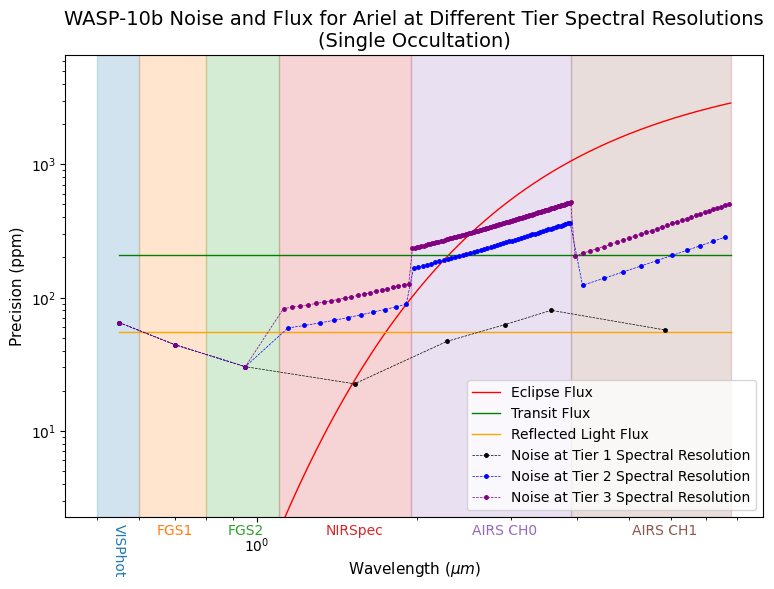

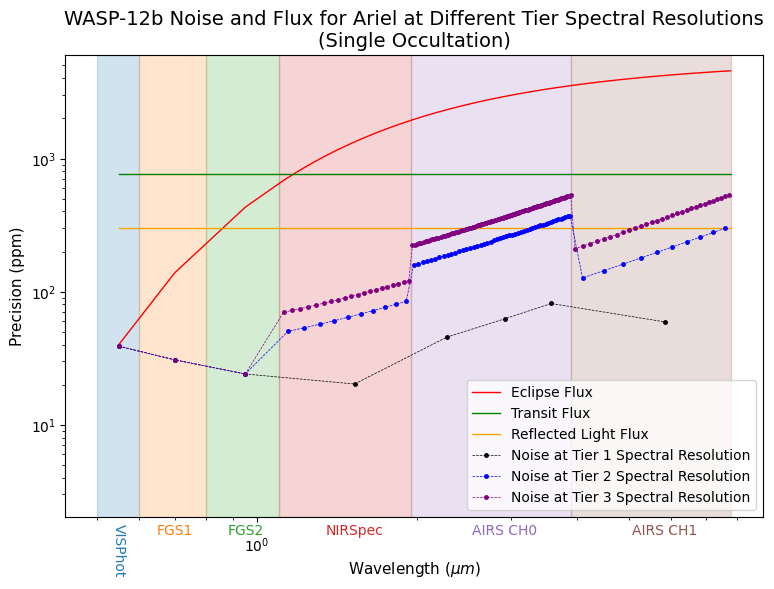

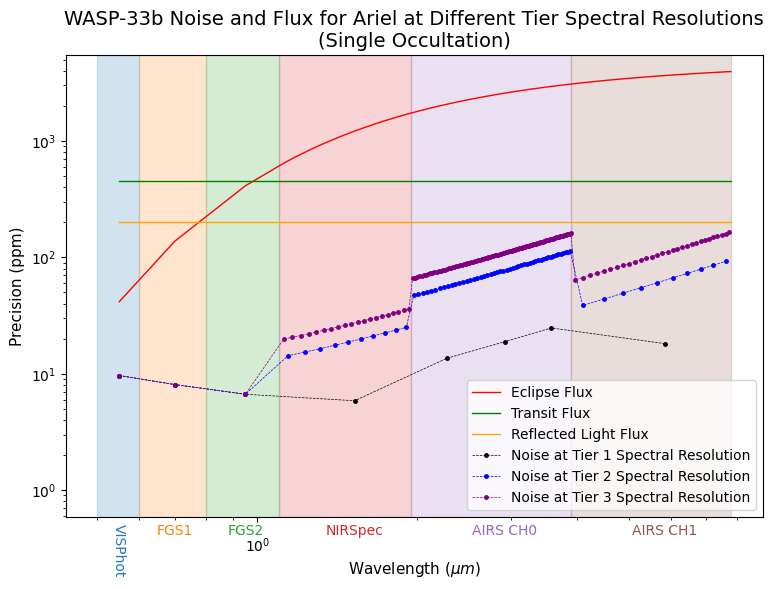

In [7]:
Ariel.plotTieredPrecisionProfile("WASP-10b", default_save=True)
Ariel.plotTieredPrecisionProfile("WASP-12b", default_save=True)
Ariel.plotTieredPrecisionProfile("WASP-33b", default_save=True)

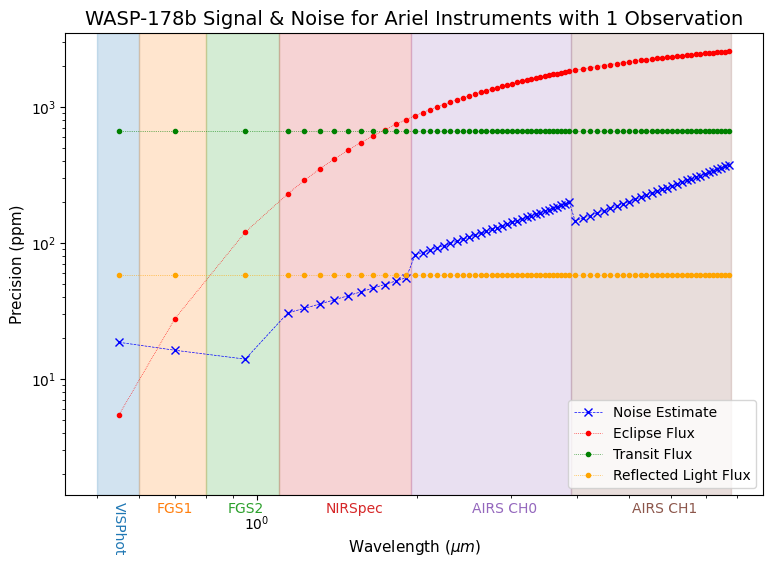

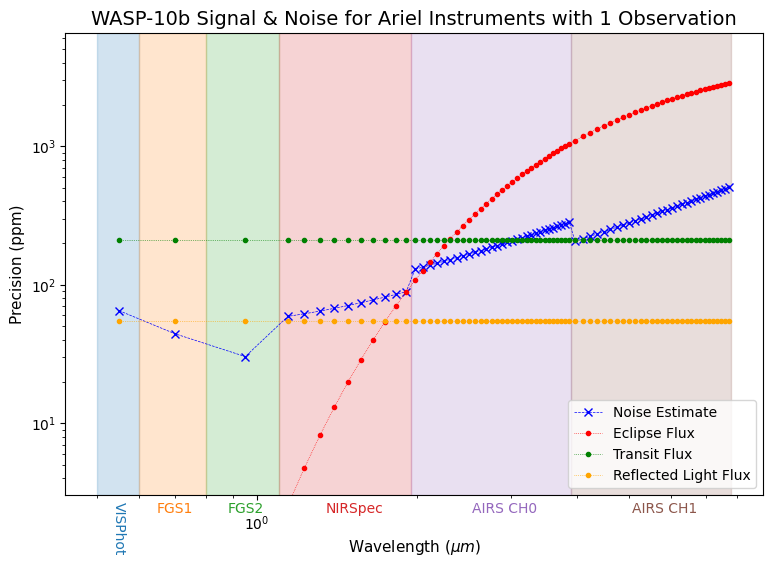

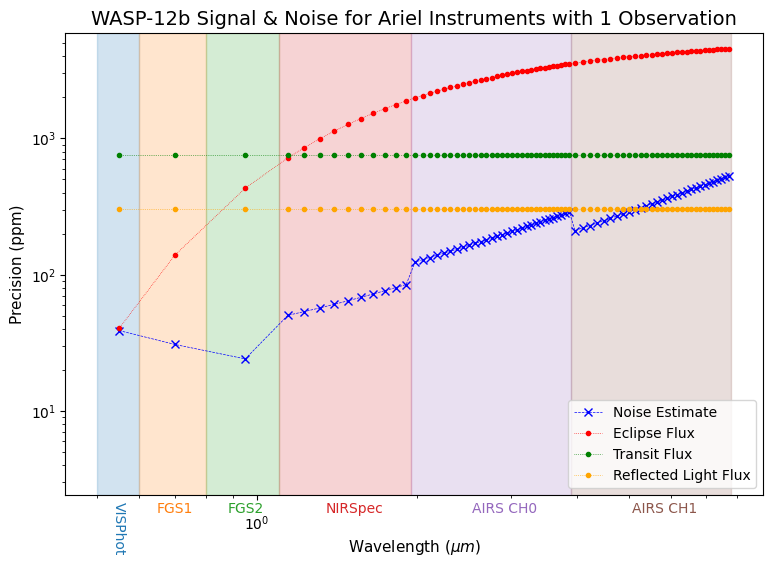

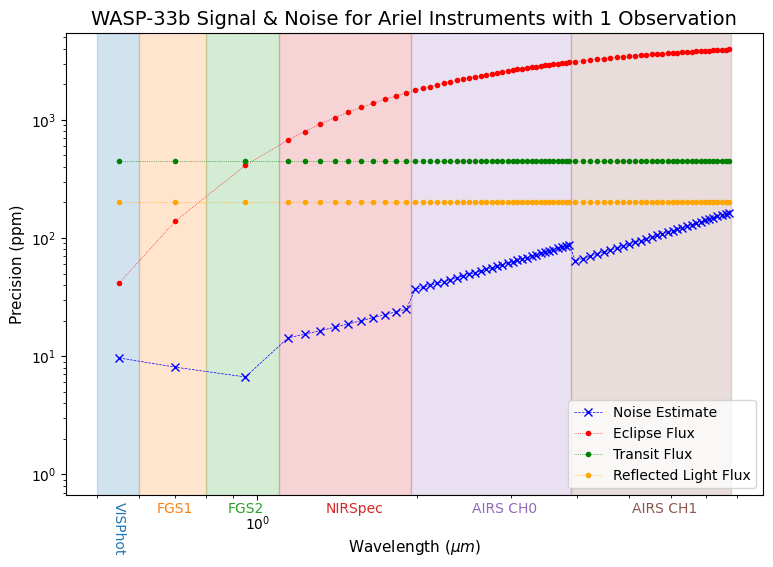

In [8]:
Ariel.plotPrecisionProfile("WASP-178b", default_save=True)
Ariel.plotPrecisionProfile("WASP-10b", default_save=True)
Ariel.plotPrecisionProfile("WASP-12b", default_save=True)
Ariel.plotPrecisionProfile("WASP-33b", default_save=True)

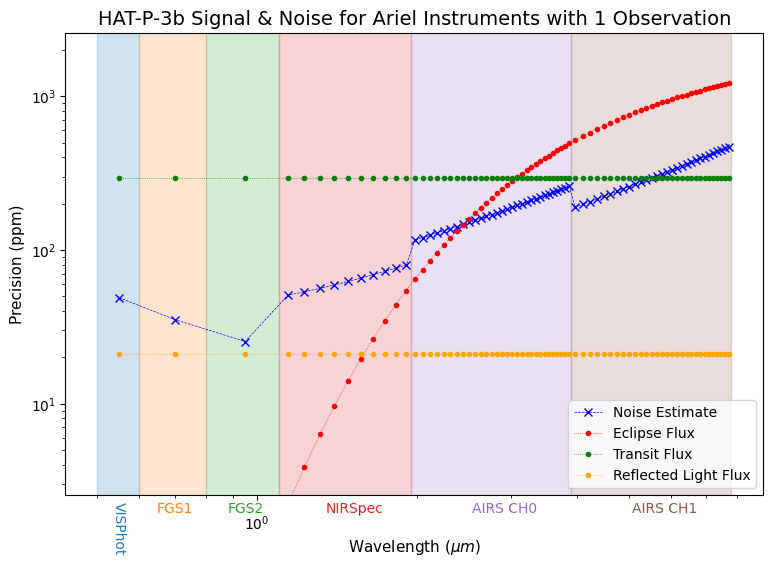

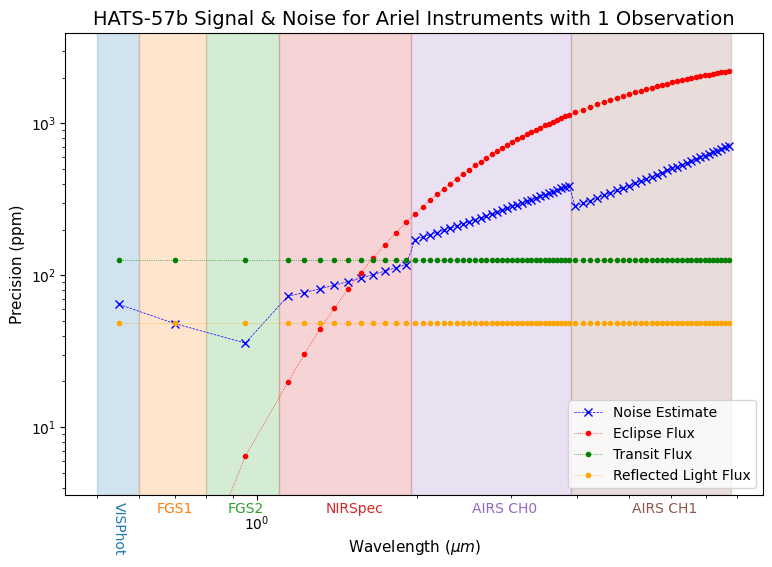

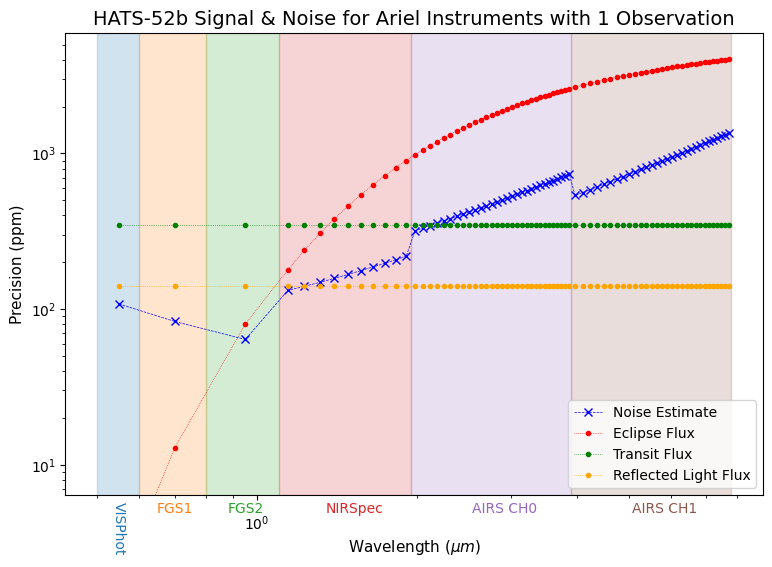

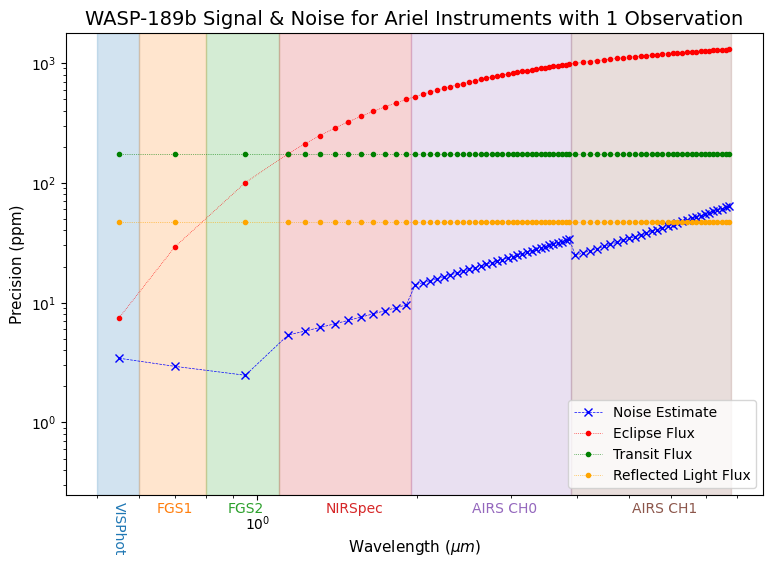

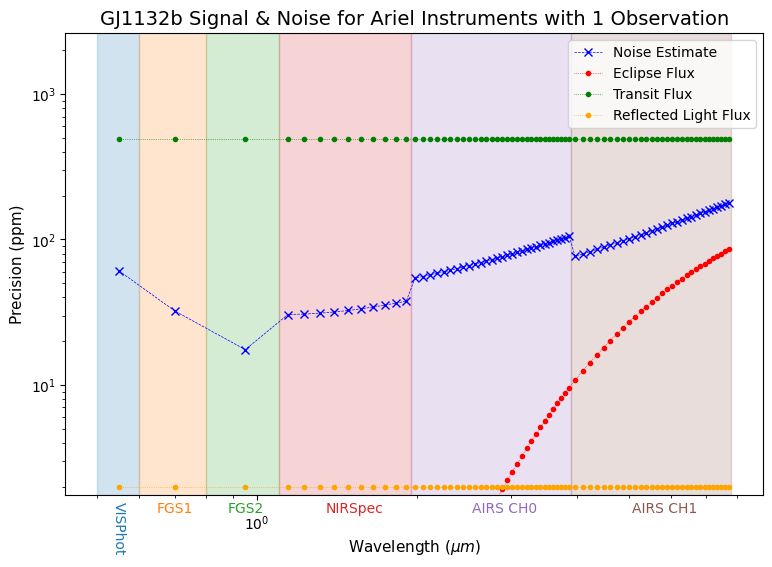

In [9]:
for planet in target_list.sort_values("Tier 1 Observations Edwards", ascending=True).head(5)["Planet Name"]:
    Ariel.plotPrecisionProfile(planet, default_save=True)

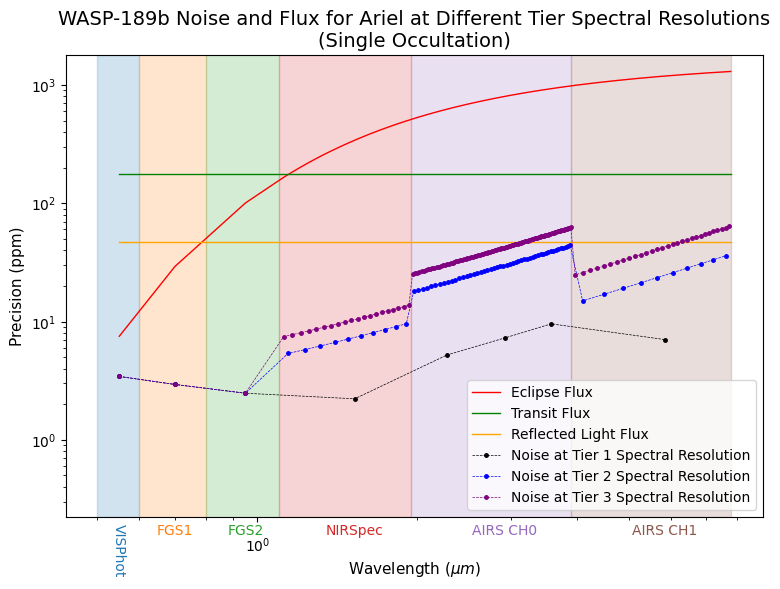

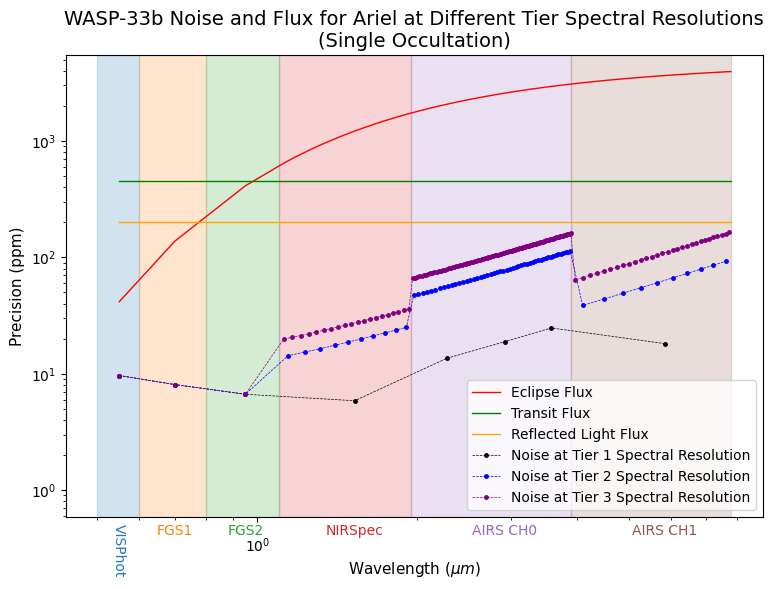

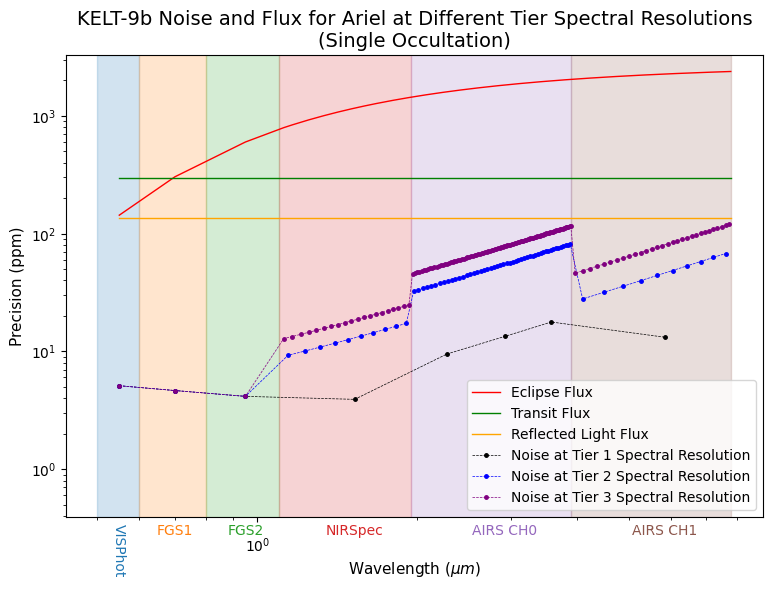

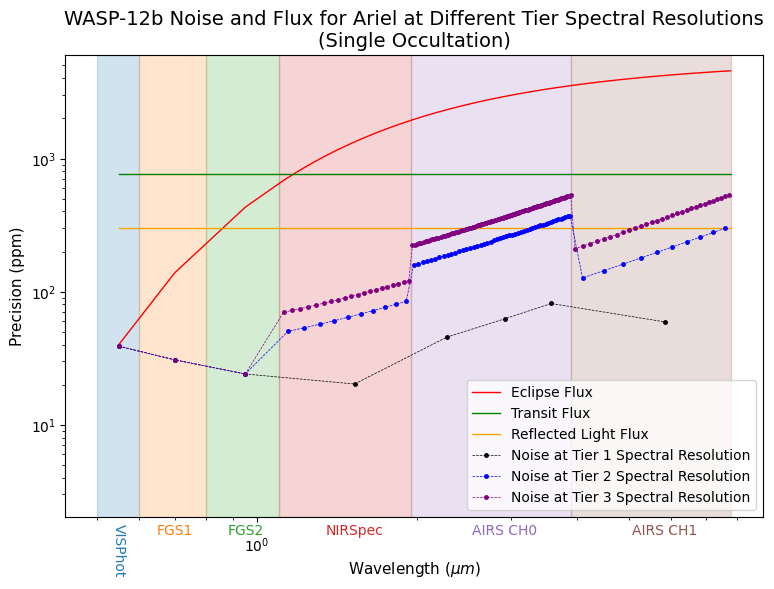

In [10]:
Ariel.plotTieredPrecisionProfile("WASP-189b", default_save=True)
Ariel.plotTieredPrecisionProfile("WASP-33b", default_save=True)
Ariel.plotTieredPrecisionProfile("KELT-9b", default_save=True)
Ariel.plotTieredPrecisionProfile("WASP-12b", default_save=True)